In [120]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

## Question 1
Loading in and cleanin up the data. There are a few values missing corresponding to public holidays where no trade takes place. I've trimmed these ones out so I don't get NaN's for values. For this question, I've calculated the daily logarithmic returns and graphed it out below.

In [2]:
btc = pd.read_csv(r'C:\Users\Andrew\OneDrive\UTS Lecture Notes\Fundamentals of Derivative Security Pricing\Group Assignment\BTCUSD.CSV', usecols=['Close'])
gold = pd.read_csv(r'C:\Users\Andrew\OneDrive\UTS Lecture Notes\Fundamentals of Derivative Security Pricing\Group Assignment\Gold.CSV', usecols=['GOLDAMGBD228NLBM'])
btc.dropna(subset=['Close'], inplace=True)
gold.dropna(subset=['GOLDAMGBD228NLBM'], inplace=True)

In [113]:
btc_list = []
gold_list = []

btcLogReturns = []
goldLogReturns = []

for i in btc['Close']: # Converting everything to the list data structure 
    btc_list.append(i)

for i in gold['GOLDAMGBD228NLBM']:
    gold_list.append(i)

for i in range(len(btc_list)-1): # Calculating daily log returns for bitcoin
    btcLogReturns.append(np.log(btc_list[i+1]) - np.log(btc_list[i]))

for i in range(len(gold_list) - 1): # Calculating daily log returns for gold
    goldLogReturns.append(np.log(gold_list[i+1]) - np.log(gold_list[i]))

btc_std = np.std(btcLogReturns)
gold_std = np.std(goldLogReturns)
#print("log Gold returns standard deviation is: ", gold_std, '\n')
#print("log BTC returns standard deviation is: ", btc_std)

For Gold, here is a chart of the actual daily close prices and the daily log returns. The standard deviation of the daily log return is: 0.01249622148183686

Text(0.5, 1.0, 'Gold Daily Log Return')

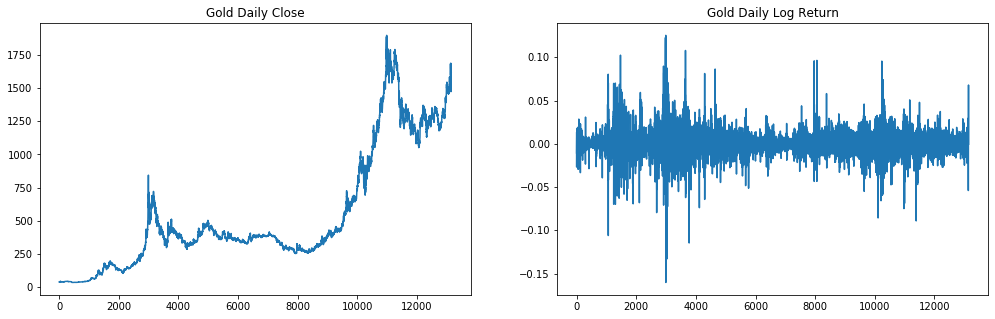

In [114]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 5))
axes[0].plot(gold_list)
axes[0].set_title('Gold Daily Close')
axes[1].plot(goldLogReturns)
axes[1].set_title('Gold Daily Log Return')

For Bitcoin, here is a chart of the actual daily close prices and the daily log returns. The standard deviation of the daily log return is: 0.03997358288686073

Text(0.5, 1.0, 'Bitcoin Daily Log Return')

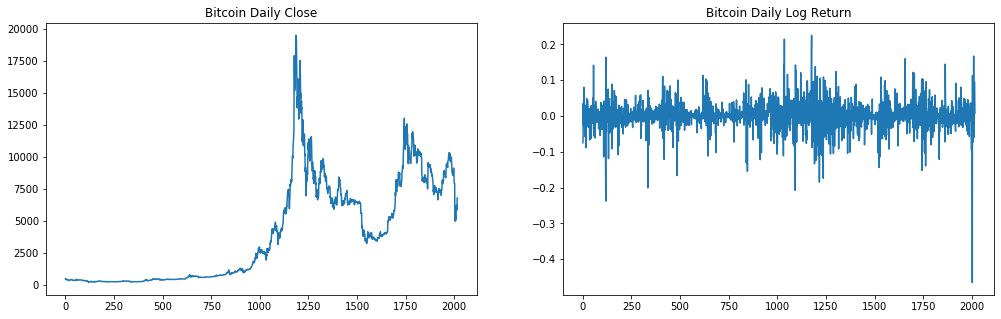

In [115]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 5))
axes[0].plot(btc_list)
axes[0].set_title('Bitcoin Daily Close')
axes[1].plot(btcLogReturns)
axes[1].set_title('Bitcoin Daily Log Return')

In [161]:
## Some testing code
print(gold_list[13075])
print(gold_list[13075+69]) #1916
print(btc_list[1916])
print(btc_list[1916 + 69])

1477.4
1620.1
6932.480469
9924.515625


## Question 6

In [162]:
def option_price(X, Y, K, r, sigma, xi, T, t):
    d_1 = (np.log(X/(Y*K)) + r + (0.5*((sigma - xi)**2)*(T - t)))/np.sqrt(((sigma - xi)**2)*(T - t))
    d_2 = (np.log(X/(Y*K)) - r + (0.5*((sigma - xi)**2)*(T - t)))/np.sqrt(((sigma - xi)**2)*(T - t))
    C = (X*norm.cdf(d_1)) - (Y*np.exp(-r*(T-t)*K*norm.cdf(d_2)))
    return C
T = 69 # Number of trading periods

r = 0.05/250 # The number of trading days per year
p_l = 0
K = 0.16

sigma = gold_std
xi = btc_std

## All the variables we've worked out previously
for t in range(0,69):
    current = option_price(gold_list[13075 + t], btc_list[1916 + t], K, r, sigma, xi, T, t)
    p_l += current*np.exp(-r*(T-t))
print(p_l)

-504253.3152272805
